In [1]:
# Constrcut raw datasets, a file with features and 
import h5py
import os
import pandas as pd
    
raw_dataset_base_path="/media/sun/DATA/Research/experimental_data/drop_landing/binfei_data/knee-angles-fbf_v1.3/ProcessedData_v2/"
def generate_h5_dataset(raw_dataset_base_path):
    raw_features_data=[]
    raw_labels_data=[]
    raw_data_files=os.listdir(raw_dataset_base_path)
    for idx in range(70):
        raw_features_file="subject_"+str(idx)+"_imu_feature_data.csv"
        if(raw_features_file in raw_data_files):
            #print("file exist")
            print(raw_features_file)
            raw_features_data.append(pd.read_csv(raw_dataset_base_path+raw_features_file))
        
        raw_labels_file="subject_"+str(idx)+"_v3d_target_data.csv"
        if(raw_labels_file in raw_data_files):
            #print("file exist")
            print(raw_labels_file)
            raw_labels_data.append(pd.read_csv(raw_dataset_base_path+raw_labels_file))
    
    # remove the exist h5 file
    h5format_dataset="raw_datasets.hdf5"
    if os.path.exists(h5format_dataset):
        try:
            os.remove(h5format_dataset)
        except IOError:
            print("cannot remove h5 file")
    
    # save the h5 file
    f = h5py.File(h5format_dataset, "w")
    for idx in range(len(raw_labels_data)):
        raw_datasets=pd.concat([raw_features_data[idx],raw_labels_data[idx]],axis=1,)
        f.create_dataset("sub_"+str(idx),data=raw_datasets)
        f["sub_"+str(idx)].attrs['columns']=list(raw_datasets.columns)
        
    f.close()
    


### Testing the h5 file data

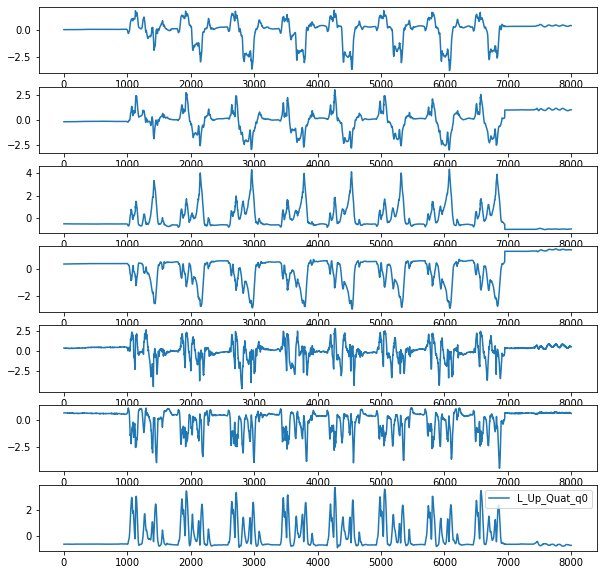

In [20]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


features_names=['L_Up_Quat_q0', 'L_Up_Quat_q1', 'L_Up_Quat_q2', 'L_Up_Quat_q3',
                        'L_Lower_Quat_q0', 'L_Lower_Quat_q1', 'L_Lower_Quat_q2', 'L_Lower_Quat_q3',
                        'R_Up_Quat_q0', 'R_Up_Quat_q1', 'R_Up_Quat_q2', 'R_Up_Quat_q3',
                       'R_Lower_Quat_q0', 'R_Lower_Quat_q1', 'R_Lower_Quat_q2', 'R_Lower_Quat_q3']
labels_names=['L_IE', 'L_AA', 'L_FE','R_IE','R_AA','R_FE']

"""
All columns of the experimental data

['Time' 'L_Up_Acc_X' 'L_Up_Acc_Y' 'L_Up_Acc_Z' 'L_Up_Gyr_X' 'L_Up_Gyr_Y'
 'L_Up_Gyr_Z' 'L_Up_Mag_X' 'L_Up_Mag_Y' 'L_Up_Mag_Z' 'L_Up_Quat_q0'
 'L_Up_Quat_q1' 'L_Up_Quat_q2' 'L_Up_Quat_q3' 'L_Lower_Acc_X'
 'L_Lower_Acc_Y' 'L_Lower_Acc_Z' 'L_Lower_Gyr_X' 'L_Lower_Gyr_Y'
 'L_Lower_Gyr_Z' 'L_Lower_Mag_X' 'L_Lower_Mag_Y' 'L_Lower_Mag_Z'
 'L_Lower_Quat_q0' 'L_Lower_Quat_q1' 'L_Lower_Quat_q2' 'L_Lower_Quat_q3'
 'R_Up_Acc_X' 'R_Up_Acc_Y' 'R_Up_Acc_Z' 'R_Up_Gyr_X' 'R_Up_Gyr_Y'
 'R_Up_Gyr_Z' 'R_Up_Mag_X' 'R_Up_Mag_Y' 'R_Up_Mag_Z' 'R_Up_Quat_q0'
 'R_Up_Quat_q1' 'R_Up_Quat_q2' 'R_Up_Quat_q3' 'R_Lower_Acc_X'
 'R_Lower_Acc_Y' 'R_Lower_Acc_Z' 'R_Lower_Gyr_X' 'R_Lower_Gyr_Y'
 'R_Lower_Gyr_Z' 'R_Lower_Mag_X' 'R_Lower_Mag_Y' 'R_Lower_Mag_Z'
 'R_Lower_Quat_q0' 'R_Lower_Quat_q1' 'R_Lower_Quat_q2' 'R_Lower_Quat_q3'
 'Time' 'R_IE' 'R_AA' 'R_FE' 'L_IE' 'L_AA' 'L_FE']
"""

def read_rawdata(row_idx,col_names):
    """
    @Description:
    To read the data from h5 file.
    @Parameters:
    Row_idx: the index of row. int
    Col_names: the names of columns. string
    
    """
    with h5py.File('raw_datasets.hdf5', 'r') as fd:
        ## The coloms of the features and labels
        keys=list(fd.keys())
        columns=fd[keys[0]].attrs.get('columns')
        col_idxs=[]
        for col_name in col_names:
            col_idxs.append(np.argwhere(columns==col_name)[0][0])
        
        data_len_list=[]
        for idx in range(len(fd.keys())):
            key="sub_"+str(idx)
            #print(key)
            data_len_list.append(len(fd[key]))
        
        data_len_list_sum=[]
        sum_num=0
        for num in data_len_list:
            sum_num+=num
            data_len_list_sum.append(sum_num)
        
        data_len_list_sum=np.array(data_len_list_sum)
        
        sub_idx=np.argwhere(data_len_list_sum > row_idx)[0,0]
        if(sub_idx>0):
            row_idx=row_idx-data_len_list_sum[sub_idx-1]
        return fd['sub_'+str(sub_idx)][row_idx,col_idxs]
        
        
#Visulization of raw data
data_list=[]
col_names=["L_Up_Quat_q0","L_Up_Quat_q1","L_Up_Quat_q2","L_Up_Quat_q3","L_IE","L_AA","L_FE"]
for idx in range(8000):
     data_list.append(read_rawdata(idx,col_names))

data_list=np.array(data_list)

data_list=(data_list-np.mean(data_list,axis=0,keepdims=True))/np.std(data_list,axis=0,keepdims=True)

figsize=(10,10)
axs=plt.figure(figsize=figsize).subplots(len(col_names),1)

#axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows, cols)
#axs = trim_axs(axs, len(cases))
#for ax, case in zip(axs, cases):
#    ax.set_title('markevery=%s' % str(case))
#    ax.plot(x, y, 'o', ls='-', ms=4, markevery=case)


axs[0].plot(data_list[:,0])
axs[1].plot(data_list[:,1])
axs[2].plot(data_list[:,2])
axs[3].plot(data_list[:,3])
axs[4].plot(data_list[:,4])
axs[5].plot(data_list[:,5])
axs[6].plot(data_list[:,6])
plt.legend(col_names)